In [9]:
import pandas as pd
import numpy as np


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df=pd.read_csv('Downloads/bank+marketing/bank/bank-full.csv',sep=';')

In [11]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
# will have to treat jobs as a categorical variable
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [14]:
#Convert binary features to a numerical form
df['default']=df.default.map(dict(yes=1,no=0))
df['housing']=df.housing.map(dict(yes=1,no=0))
df['loan']=df.loan.map(dict(yes=1,no=0))
df['y']=df.y.map(dict(yes=1,no=0))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [15]:
# change contact to a numerical type.  blend cellular and telephone to establish a binary
df['contact']=df.contact.map(dict({'cellular':1,'unknown':0,'telephone':1}))
df['contact'].value_counts()

1    32191
0    13020
Name: contact, dtype: int64

In [16]:
#Convert months from string to int
df['month']=df.month.map(dict({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,0,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,0,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,0,5,5,198,1,-1,0,unknown,0


In [17]:
# change previous outcome poutcome to numerical.  
df['poutcome']=df.poutcome.map(dict({'failure':-1,'unknown':0,'other':0,'success':1}))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,technician,single,secondary,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,unknown,single,unknown,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [18]:
# Change education and marital to numerical object types
df['education']=df.education.map(dict({'unknown':0,'primary':1,'secondary':2,'tertiary':3}))
df['marital']=df.marital.map(dict({'single':0,'married':1,'divorced':-1}))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,technician,0,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,entrepreneur,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,blue-collar,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,unknown,0,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [19]:
# Build training and test datasets for modeling.  Drop job bc it is categorical.  Will use groups later to look at jobs
X=df.drop(['y','job'],axis=1)
y=df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# fairly imbalanced dataset at 89% 'no'.  Models need to be in the mid 90's to be valid.
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [21]:
# GridSearch optimized for recall determined optimal n_neighbors to be 5.  See code in Appendix for more detail.
# Note that Gridsearches take a long time to run.  Uncomment them if you want to run them yourself.
#%%time
pipe_knn=Pipeline([('scale',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=5))])
pipe_knn.fit(X_train,y_train)
preds_knn=pipe_knn.predict(X_test)

/Users/joshuagreenberg/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
%%time
pipe_lr=Pipeline([('scale',StandardScaler()),('lr',LogisticRegression())])
pipe_lr.fit(X_train,y_train)
preds_lr=pipe_lr.predict(X_test)

CPU times: user 246 ms, sys: 10.7 ms, total: 256 ms
Wall time: 51.8 ms


In [23]:
%%time
pipe_dt=Pipeline([('scale',StandardScaler()),('dt',DecisionTreeClassifier())])
pipe_dt.fit(X_train,y_train)
preds_dt=pipe_dt.predict(X_test)

CPU times: user 165 ms, sys: 4.25 ms, total: 169 ms
Wall time: 174 ms


In [24]:
%%time
pipe_svc=Pipeline([('scale',StandardScaler()),('svc',SVC(C=5))])
pipe_svc.fit(X_train,y_train)
preds_svc=pipe_svc.predict(X_test)

CPU times: user 23.4 s, sys: 161 ms, total: 23.6 s
Wall time: 23.6 s


In [238]:
df_recall=pd.DataFrame(columns=('Model','Recall_Score_%'))
df_recall.loc[len(df_recall)]=('SVC',int(100*recall_score(preds_svc, y_test)))
df_recall.loc[len(df_recall)]=('Logistic_Regression',int(100*recall_score(preds_lr, y_test)))
df_recall.loc[len(df_recall)]=('K_Nearest_Neighbor',int(100*recall_score(preds_knn, y_test)))
df_recall.loc[len(df_recall)]=('Decision_Tree',int(100*recall_score(preds_dt, y_test)))



df_recall.head()

,Model,Recall_Score_%
0,SVC,63
1,Logistic_Regression,62
2,K_Nearest_Neighbor,58
3,Decision_Tree,46


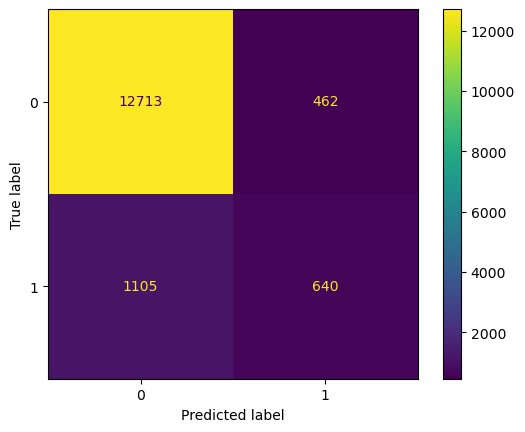

In [26]:
cm_knn=confusion_matrix(y_test,preds_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()

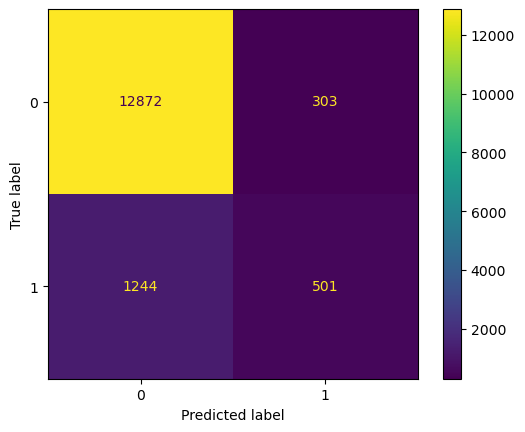

In [27]:
cm_lr=confusion_matrix(y_test,preds_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()

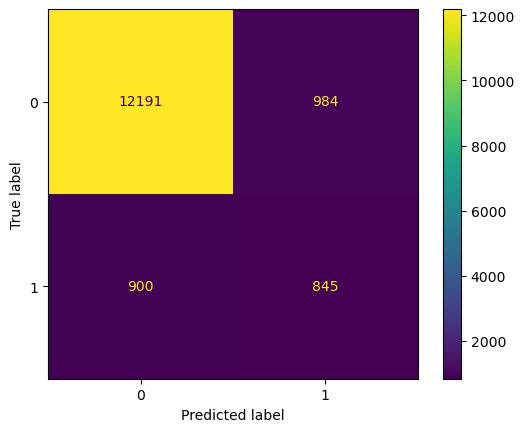

In [28]:
cm_dt=confusion_matrix(y_test,preds_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()

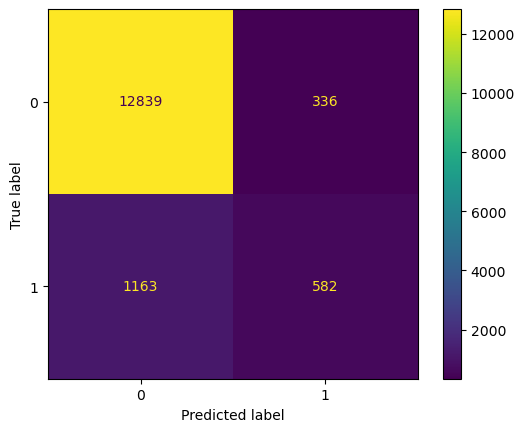

In [29]:
cm_svc=confusion_matrix(y_test,preds_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()

CPU times: user 15.9 s, sys: 122 ms, total: 16 s
Wall time: 16 s


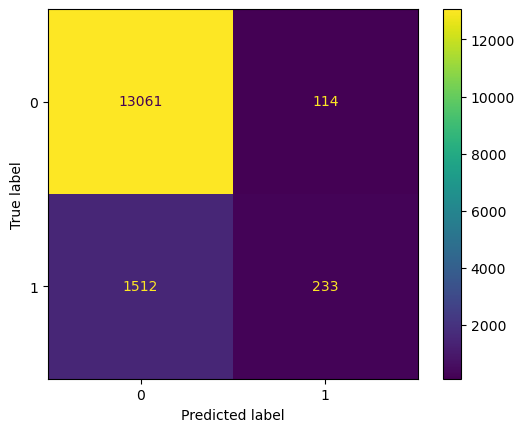

In [30]:
%%time
pipe_svc_lr=Pipeline([('scale',StandardScaler()),('svc_lr',SVC(kernel='linear'))])
pipe_svc_lr.fit(X_train,y_train)
preds_svc_lr=pipe_svc_lr.predict(X_test)
cm_svc_lr=confusion_matrix(y_test,preds_svc_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_lr)
disp.plot()

CPU times: user 15.5 s, sys: 115 ms, total: 15.6 s
Wall time: 15.6 s


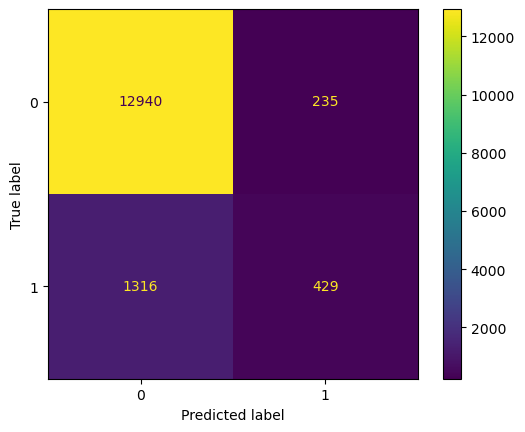

In [31]:
%%time
pipe_svc_poly=Pipeline([('scale',StandardScaler()),('svc_poly',SVC(kernel='poly'))])
pipe_svc_poly.fit(X_train,y_train)
preds_svc_poly=pipe_svc_poly.predict(X_test)
cm_svc_poly=confusion_matrix(y_test,preds_svc_poly)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_poly)
disp.plot()

In [33]:
print(pipe_knn.named_steps.knn.weights,'\n')  # KNN does not have a numerical method for feature importance
print(pipe_lr.named_steps.lr.coef_,'\n')
print(pipe_dt.named_steps.dt.feature_importances_,'\n')
print(pipe_svc_lr.named_steps.svc_lr.coef_,'\n')

uniform 

[[ 0.03314937 -0.11904886  0.1313086  -0.03267785  0.05527678 -0.45794359
  -0.23638935  0.60755117 -0.03289361 -0.02878567  1.03785855 -0.42882605
   0.34481068  0.13331141  0.46417372]] 

[0.10182822 0.02358657 0.02349594 0.00180442 0.12778311 0.01438941
 0.00657587 0.01644129 0.09828573 0.08052357 0.29847543 0.03478749
 0.05825006 0.01767445 0.09609845] 

[[ 0.02450881 -0.02555969  0.03560647 -0.00820317  0.01139151 -0.12022538
  -0.06738356  0.13883501 -0.0038281   0.0045625   0.32979599 -0.10245188
   0.13611609  0.03311548  0.23394571]] 



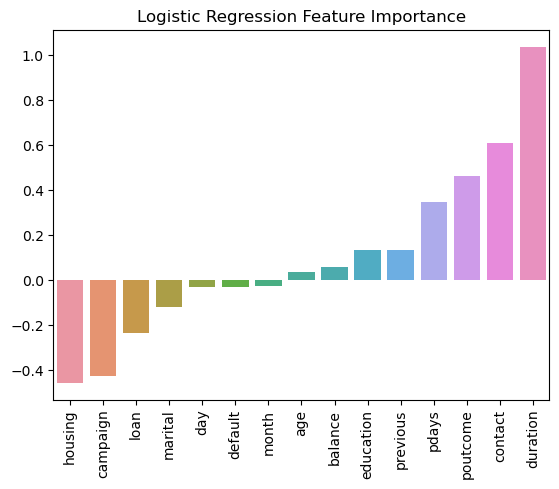

In [35]:
#print(pipe_lr.named_steps.scale.get_feature_names_out())
df_lr_features=pd.DataFrame(pipe_lr.named_steps.lr.coef_,columns=pipe_lr.named_steps.scale.get_feature_names_out())
df_lr_features=df_lr_features.sort_values(by=0, ascending=True, axis=1)
df_lr_features.head()
sns.barplot(data=df_lr_features).set(title='Logistic Regression Feature Importance')
plt.xticks(rotation=90);

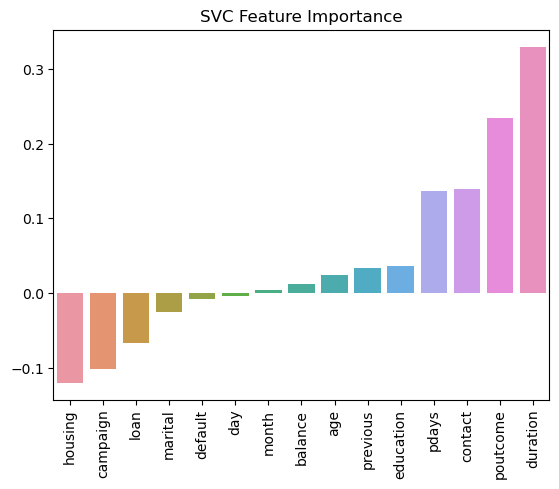

In [36]:
#print(pipe_lr.named_steps.scale.get_feature_names_out())
df_svc_features=pd.DataFrame(pipe_svc_lr.named_steps.svc_lr.coef_,columns=pipe_svc_lr.named_steps.scale.get_feature_names_out())
df_svc_features=df_svc_features.sort_values(by=0, ascending=True, axis=1)
df_svc_features.head()
sns.barplot(data=df_svc_features).set(title='SVC Feature Importance')
plt.xticks(rotation=90);

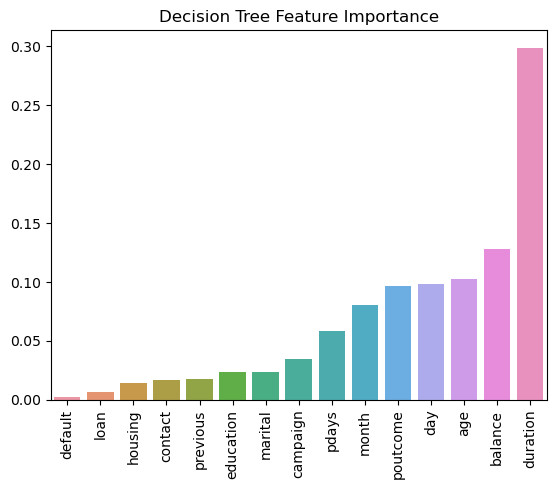

In [37]:
df_dt_features=pd.DataFrame(columns=pipe_dt.named_steps.scale.get_feature_names_out())
df_dt_features.loc[len(df_dt_features)] = pipe_dt.named_steps.dt.feature_importances_
df_dt_features=df_dt_features.sort_values(by=0, ascending=True, axis=1)
df_dt_features.head()
sns.barplot(data=df_dt_features).set(title='Decision Tree Feature Importance')
plt.xticks(rotation=90);

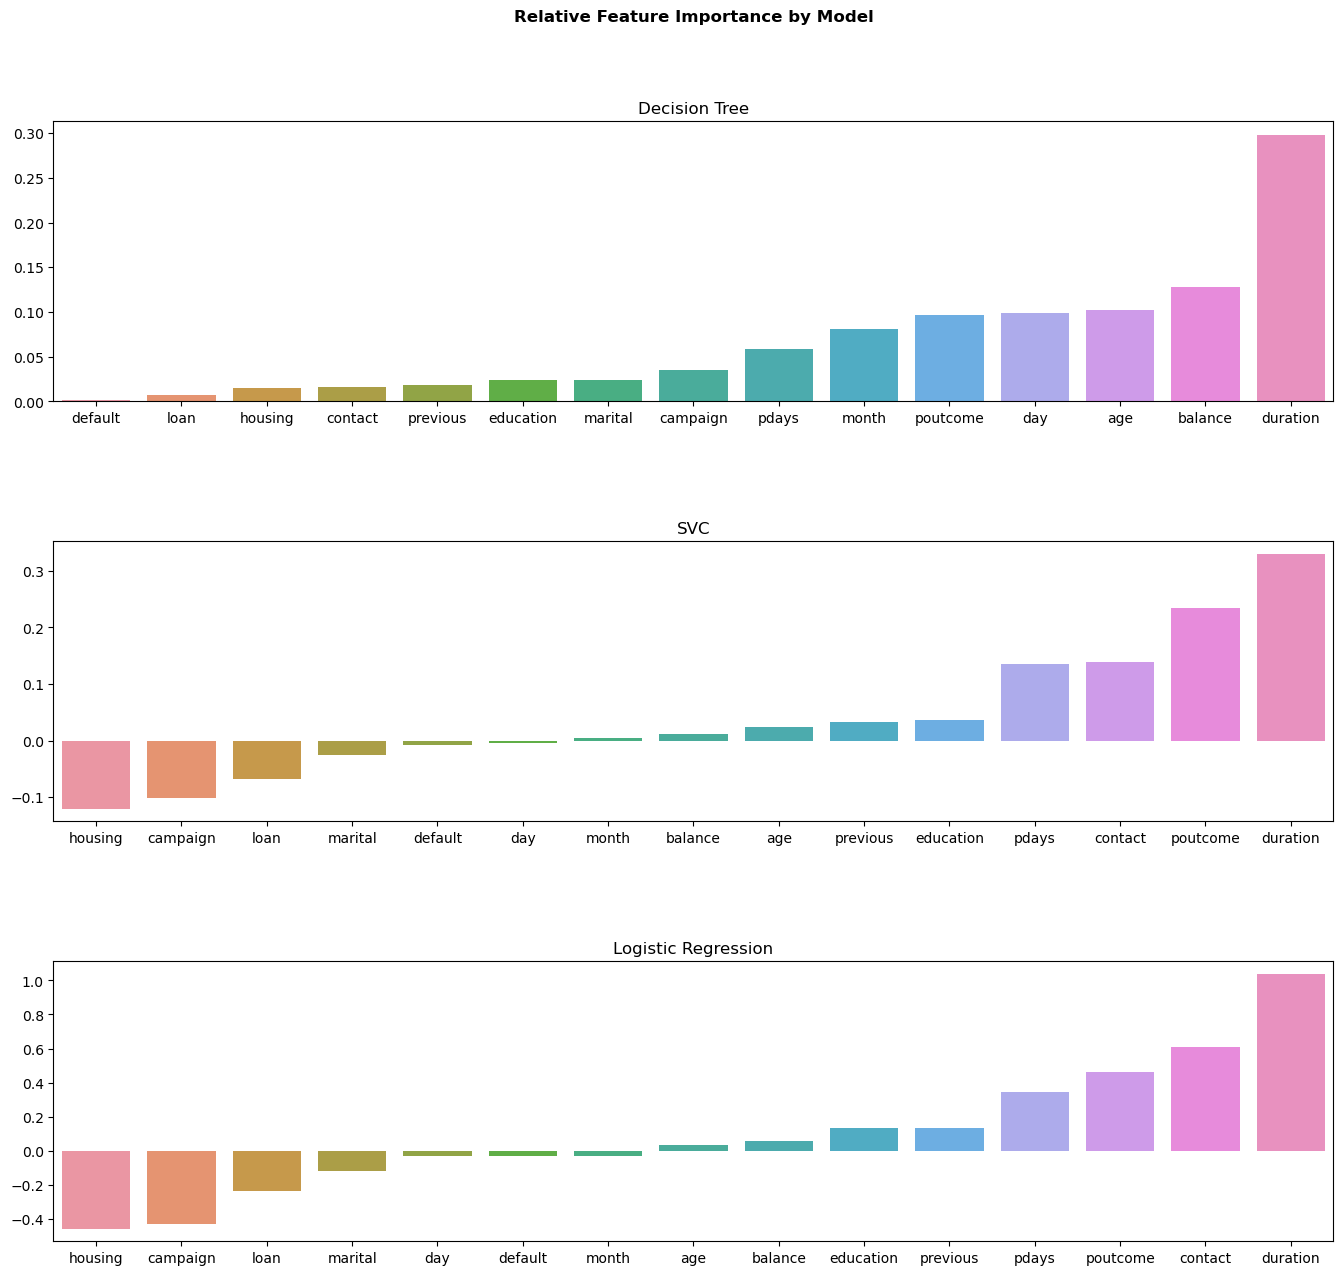

In [225]:
# combine all feature plots
fig, axs = plt.subplots(figsize=(16, 14),nrows=3)
sns.barplot(data=df_dt_features,ax=axs[0])
sns.barplot(data=df_svc_features,ax=axs[1]).set(title='SVC')
sns.barplot(data=df_lr_features,ax=axs[2]).set(title='Logistic Regression')
axs[0].set(title='Decision Tree')
plt.suptitle("Relative Feature Importance by Model",fontweight='bold')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.5)

plt.savefig('/var/local/data/bank_loan_predictor/images/Relative_Feature_Importance.png')
plt.show();
#plt.tight_layout(pad=5.0)
#plt.xticks(rotation=90);

In [86]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,technician,0,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,entrepreneur,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,blue-collar,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,unknown,0,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [161]:
#Explore Conversion rates by binary variables
# Because they are binary, mean represents their relative conversion rates
# Note that previous outcome is the strongest indicator at 64.7%

print(df.groupby(['marital'])['y'].mean())
print(df.groupby(['poutcome'])['y'].mean())
print(df.groupby(['education'])['y'].mean())
print(df.groupby(['housing'])['y'].mean())
print(df.groupby(['contact'])['y'].mean())
print(df.groupby(['poutcome'])['y'].mean())


marital
-1    0.119455
 0    0.149492
 1    0.101235
Name: y, dtype: float64
poutcome
-1    0.126097
 0    0.095183
 1    0.647253
Name: y, dtype: float64
education
0    0.135703
1    0.086265
2    0.105594
3    0.150064
Name: y, dtype: float64
housing
0    0.167024
1    0.077000
Name: y, dtype: float64
contact
0    0.040707
1    0.147836
Name: y, dtype: float64
poutcome
-1    0.126097
 0    0.095183
 1    0.647253
Name: y, dtype: float64


In [122]:
# Find split for each continous feature, plan to use the midpoint between two numbers to optimize results
# will use > 40 for age
# will use 1300 for balance
# will use 220 for duration
print(df.groupby(['y'])['age'].mean())
print(df.groupby(['y'])['balance'].mean())
print(df.groupby(['y'])['duration'].mean())
print(df['duration'].mean())

y
0    40.838986
1    41.670070
Name: age, dtype: float64
y
0    1303.714969
1    1804.267915
Name: balance, dtype: float64
y
0    221.182806
1    537.294574
Name: duration, dtype: float64
258.1630797814691


In [152]:
# Build a dataframe to plot conversion rate by job
# Note that students and retirees have the highest conversion rates
df_jobs=pd.DataFrame(df.groupby('job')['y'].mean())
df_jobs=df_test.reset_index()
df_jobs['y']=round(df_jobs['y']*100,1)
df_jobs = df_jobs.rename(columns={'y': 'Conversion_%','job':'Job'})
df_jobs=df_jobs.sort_values(by='Conversion_%')
df_jobs.head()



,index,Job,Conversion_%
1,1,blue-collar,7.3
2,2,entrepreneur,8.3
3,3,housemaid,8.8
7,7,services,8.9
9,9,technician,11.1


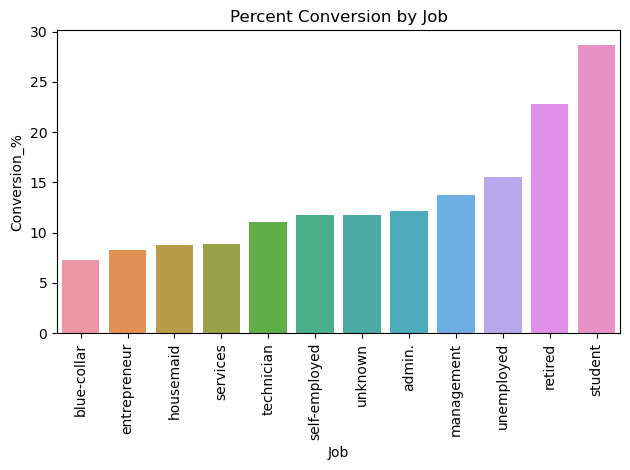

In [227]:
sns.barplot(data=df_jobs, x='Job',y='Conversion_%').set(title='Percent Conversion by Job')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/var/local/data/bank_loan_predictor/images/Conversion_By_Job.jpg')
plt.show();

In [ ]:
df_recall.loc[len(df_recall)]=('Decision_Tree','Job_Cohort',int(100*recall_score(preds_dt_cohort, y_cohort_test)))

In [156]:
# Start exploring cohorts that we can assemble to provide high value targets for the sales team
job_cohort=('retired','student')
job_cohort_df=df.query('job.isin(@job_cohort)')
print('job_cohort mean:',job_cohort_df['y'].mean(),'/n')
print('original mean:',df['y'].mean(),'/n')

job_cohort mean: 0.24515927545284197 /n
original mean: 0.11698480458295547 /n


In [208]:
po_cohort_df=df.query('poutcome == 1 ')
print('po_cohort mean:',po_cohort_df['y'].mean(),'/n')
print('original mean:',df['y'].mean(),'/n')

po_cohort mean: 0.6472534745201853 /n
original mean: 0.11698480458295547 /n


In [209]:
results_df.head()

,Cohort,Percent_Conversion
0,Previous Outcome Cohort,0.647253
1,Previous Outcome Cohort,64.700000


In [197]:
duration_cohort_df=df.query('duration > 220')
print('duration cohort mean:',duration_cohort_df['y'].mean(),'/n')

duration cohort mean: 0.22932721211127507 /n


In [163]:
student_cohort_df=df.query('job == "student"')
print('student cohort mean:',student_cohort_df['y'].mean(),'/n')

student cohort mean: 0.2867803837953092 /n


In [198]:
balance_cohort_df=df.query('balance > 1300')
print('balance cohort mean:',balance_cohort_df['y'].mean(),'/n')

balance cohort mean: 0.15814448171479997 /n


In [162]:
housing_cohort_df=df.query('housing == 0')
print('housing cohort mean:',housing_cohort_df['y'].mean(),'/n')

housing cohort mean: 0.1670235546038544 /n


In [174]:
contact_cohort_df=df.query('contact == 1')
print('contact cohort mean:',contact_cohort_df['y'].mean(),'/n')

contact cohort mean: 0.14783635177534094 /n


In [210]:
po_dur_stud_cohort_df=df.query('poutcome==1 and duration > 300 and job == "student" ')

print('PO Dur Stud cohort mean:',po_dur_stud_cohort_df['y'].mean(),'/n')

PO Dur Stud cohort mean: 0.8214285714285714 /n


In [193]:
new_cohort_df=df.query('poutcome==1 and duration > 221 and job == "student"' )

print('full cohort mean:',new_cohort_df['y'].mean(),'/n')

full cohort mean: 0.8 /n


In [173]:
balance_cohort_df=df.query('balance > 1500')
print('balance cohort mean:',balance_cohort_df['y'].mean(),'/n')

balance cohort mean: 0.16319412574575493 /n


In [131]:
po_dur_cohort_df=df.query('poutcome == 1 and duration > 300')
print('po_dur_cohort mean:',po_dur_cohort_df['y'].mean(),'/n')


po_dur_cohort mean: 0.7749576988155669 /n


In [181]:
po_dur_cohort_df=df.query('poutcome == 1 and duration > 300 and job == "student"')
print('po_dur_cohort mean:',po_dur_cohort_df['y'].mean(),'/n')

po_dur_stud_cohort mean: 0.8238213399503722 /n


In [221]:
# Build a results dataframe to chart the cohort calculations used to support recommendations
results_df=pd.DataFrame(columns=('Cohort','Percent_Conversion'))
results_df.loc[len(results_df)]=('Repeat Customer Cohort',round(100*po_cohort_df['y'].mean(),1))
results_df.loc[len(results_df)]=('Long Duration Cohort',round(100*duration_cohort_df['y'].mean(),1))
results_df.loc[len(results_df)]=('Student Cohort',round(100*student_cohort_df['y'].mean(),1))
results_df.loc[len(results_df)]=('Large Balance Cohort',round(100*balance_cohort_df['y'].mean(),1))
results_df.loc[len(results_df)]=('Housing Cohort',round(100*housing_cohort_df['y'].mean(),1))
results_df.loc[len(results_df)]=('Top 3 Blended Cohort',round(100*po_dur_stud_cohort_df['y'].mean(),1))
results_df=results_df.sort_values(by='Percent_Conversion',ascending=True)
results_df.head(20)

,Cohort,Percent_Conversion
3,Large Balance Cohort,15.8
4,Housing Cohort,16.7
1,Long Duration Cohort,22.9
2,Student Cohort,28.7
0,Repeat Customer Cohort,64.7
5,Top 3 Blended Cohort,82.1


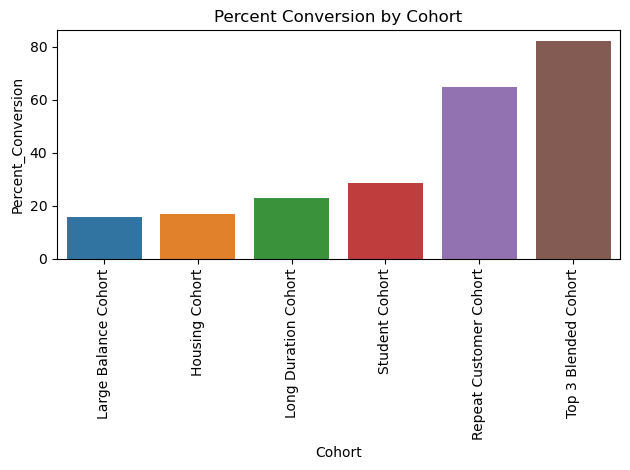

In [231]:
sns.barplot(data=results_df, x='Cohort',y='Percent_Conversion').set(title='Percent Conversion by Cohort')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/var/local/data/bank_loan_predictor/images/Conversion_By_Cohort.jpg')
plt.show();

In [230]:
phd_cohort_df=df.query('housing == 0 and duration > 300 and poutcome == 1')
print('poutcome, housing, duratiopn cohort mean:',phd_cohort_df['y'].mean(),'/n')
print('housing_dur_cohort mean:',housing_dur_cohort_df['y'].mean(),'/n')
print('job_dur_cohort mean:',job_dur_cohort_df['y'].mean(),'/n')
print('job_cohort mean:',job_cohort_df['y'].mean(),'/n')
print('original mean:',df['y'].mean(),'/n')

poutcome, housing, duratiopn cohort mean: 0.8238213399503722 /n
housing_dur_cohort mean: 0.3585147247119078 /n
job_dur_cohort mean: 0.31993965990126166 /n
job_cohort mean: 0.24515927545284197 /n
original mean: 0.11698480458295547 /n


In [ ]:
# Blend POutcome, Duration, Balance a

In [99]:
# Build training and test datasets for modeling cohorts.  Drop job bc it is categorical.  Will use groups later to look at jobs
X_cohort=pcd_cohort_df.drop(['y','job'],axis=1)
y_cohort=pcd_cohort_df['y']
X_cohort_train, X_cohort_test, y_cohort_train, y_cohort_test = train_test_split(X_cohort, y_cohort, test_size=0.33, random_state=42)

NameError: name 'df_cohort' is not defined

In [100]:
%%time
pipe_dt_cohort=Pipeline([('scale',StandardScaler()),('dt',DecisionTreeClassifier())])
pipe_dt_cohort.fit(X_cohort_train,y_cohort_train)
preds_dt_cohort=pipe_dt.predict(X_cohort_test)

NameError: name 'X_cohort_train' is not defined

In [101]:
# Build training and test datasets for modeling cohorts.  Drop job bc it is categorical.  Will use groups later to look at jobs
X_pcd_cohort=df_cohort.drop(['y','job'],axis=1)
y_pcd_cohort=df_cohort['y']
X_pcd_cohort_train, X_pcd_cohort_test, y_pcd_cohort_train, y_pcd_cohort_test = train_test_split(X_pcd_cohort, y_pcd_cohort, test_size=0.33, random_state=42)

NameError: name 'df_cohort' is not defined

In [289]:
%%time
pipe_dt_pcd_cohort=Pipeline([('scale',StandardScaler()),('dt',DecisionTreeClassifier())])
pipe_dt_pcd_cohort.fit(X_pcd_cohort_train,y_pcd_cohort_train)
preds_dt_pcd_cohort=pipe_dt.predict(X_pcd_cohort_test)

CPU times: user 90.5 ms, sys: 2.26 ms, total: 92.8 ms
Wall time: 93.2 ms


In [32]:
df_recall.loc[len(df_recall)]=('Decision_Tree','Job_Duration_Previous_Outcome_Cohort',int(100*recall_score(preds_dt_pcd_cohort, y_pcd_cohort_test)))
df_recall.head()

NameError: name 'preds_dt_pcd_cohort' is not defined

In [291]:
df_recall.loc[len(df_recall)]=('Decision_Tree','Job_Cohort',int(100*recall_score(preds_dt_cohort, y_cohort_test)))
df_recall.head()

,Model,Data_Set,Recall_Score
0,SVC,Full Data Set,63
1,Logistic_Regression,Full Data Set,62
2,K_Nearest_Neighbor,Full Data Set,58
3,Decision_Tree,Full Data Set,46
4,Decision_Tree,Job_Duration_Previous_Outcome,81


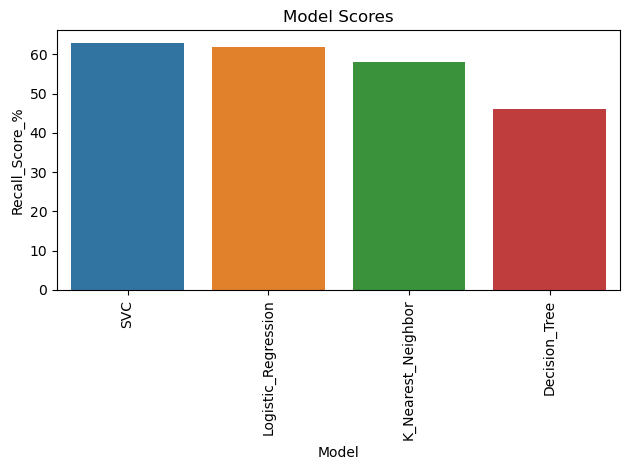

In [240]:
sns.barplot(data=df_recall,x='Model',y='Recall_Score_%').set(title="Model Scores")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/var/local/data/bank_loan_predictor/images/Model_Scores.jpg')
plt.show();

In [ ]:
##########  APPENDIX   ###########
#########   WARNING   ############
## LONG RUNNING PROCESSESS AHEAD!  ##
#########   WARNING   ############
##########  APPENDIX   ###########

In [8]:
#########   WARNING  >1 minute run time ############
#### UNCOMMENT TO RUN ########
### Sample Result Below
###: {'knn__n_neighbors': 5}

#%%time
#k_range = list(range(2, 32,3))
##param_grid = dict(n_neighbors=k_range)
#parameters = {'knn__n_neighbors': k_range}

  
## defining parameter range
#grid = GridSearchCV(pipe_knn, parameters, scoring='recall', return_train_score=False,verbose=1)
  
## fitting the model for grid search
#grid_search=grid.fit(X_train, y_train)

# best value for k
#print('###:',grid_search.best_params_)

In [150]:
#########   WARNING  > 5 minute run time ############
#### UNCOMMENT TO RUN ########
### Sample Result Below
###: {'svc_lr__C': 5}

#%%time
#c_range =[0.1,0.5,1.0,5] 
#parameters = {'svc_lr__C': c_range}

  
## defining parameter range
#grid_svc = GridSearchCV(pipe_svc_lr, parameters, scoring='recall', return_train_score=False,verbose=1)
  
##fitting the model for grid search
#grid_search_svc=grid_svc.fit(X_train, y_train)

## best value for k
#print('###:',grid_search_svc.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
###: {'svc_lr__C': 5}
CPU times: user 4min 37s, sys: 2.53 s, total: 4min 39s
Wall time: 4min 40s
